In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# LABELS
Each training and test example is assigned to one of the following labels:
- 0 T-Shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Angle boot

In [80]:
img_rows, img_cols = 28, 28

train_set = pd.read_csv('fashion-mnist_train.csv')
test_set = pd.read_csv('fashion-mnist_test.csv')
raw_train = np.array(train_set, dtype = 'float32')
raw_test = np.array(test_set, dtype = 'float32')

x_train = raw_train[:, 1:]/255.0
y_train = raw_train[:, 0].astype('int32')

x_test = raw_test[:, 1:]/255.0
y_test = raw_test[:, 0].astype('int32')

x_train = x_train.reshape(y_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(y_test.shape[0], img_rows, img_cols, 1)

print(x_train.shape)
print(x_test.shape)



(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [81]:
y_train_values = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'bag', 'Angle boot']

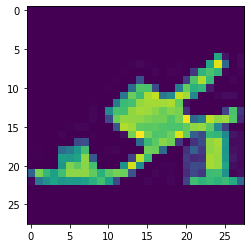

In [82]:
plt.imshow(x_train[50].reshape(28, 28))

In [83]:
print(f'{y_train[50]} ==> {y_train_values[y_train[50]]}')

5 ==> Sandal


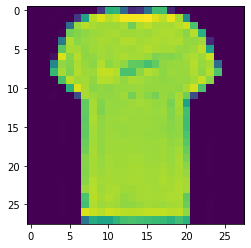

In [84]:
plt.imshow(x_train[10].reshape(28, 28))

In [85]:
print(f'{y_train[10]} ==> {y_train_values[y_train[10]]}')

0 ==> T-shirt/top


In [86]:
#creating validation set from the train set

from sklearn.model_selection import train_test_split

x_train = train_set.drop('label', axis=1)
y_train = train_set['label'].copy()
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [87]:
print(f'Length of Train set: {len(X_train)}')
print(f'Length of Validation set: {len(X_val)}')#20% of the train set


Length of Train set: 48000
Length of Validation set: 12000


In [88]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
48572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31766,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,11,37,6,0,0,0


In [89]:
y_train.head()

48572    5
38696    7
13611    8
35213    5
31766    2
Name: label, dtype: int64

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48000 entries, 48572 to 56422
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 287.5 MB


In [91]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 12628 to 36568
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 71.9 MB


In [92]:
#scaling the train set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

#training with logistic regression
from sklearn.linear_model import LogisticRegression
softmax = LogisticRegression(multi_class ='multinomial', solver='lbfgs', C=10)
softmax.fit(X_train_scaled, y_train)
    
    
#training with SGDCLASSIFIER
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train_scaled, y_train)
    
#training with DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
    
#training with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
print(f'SOFTMAX REGRESSION TESTING ACCURACY: {(softmax.score(X_train_scaled, y_train)*100)}%')
print(f'SGD CLASSIFIER TESTING ACCURACY: {(sgd.score(X_train_scaled, y_train)*100)}%')
print(f'DECISION TREE TESTING ACCURACY: {(tree.score(X_train_scaled, y_train)*100)}%')
print(f'RANDOMFOREST TESTING ACCURACY: {(forest.score(X_train_scaled, y_train)*100)}%')

SOFTMAX REGRESSION TESTING ACCURACY: 88.02499999999999%
SGD CLASSIFIER TESTING ACCURACY: 85.06041666666667%
DECISION TREE TESTING ACCURACY: 100.0%
RANDOMFOREST TESTING ACCURACY: 100.0%


## Cross Validation Scores 

In [95]:
from sklearn.model_selection import cross_val_score
softmax_scores = cross_val_score(softmax, X_train_scaled, y_train, cv=3, scoring='accuracy')

sgd_scores = cross_val_score(sgd, X_train_scaled, y_train, cv=3, scoring='accuracy')

tree_scores = cross_val_score(tree, X_train_scaled, y_train, cv=3, scoring='accuracy')

forest_scores = cross_val_score(forest, X_train_scaled, y_train, cv=3, scoring='accuracy')


print('SOFTMAX REGRESSION CROSS VALIDATION\n')
print('Scores:', softmax_scores)
print('Mean:', softmax_scores.mean())
print('Standard Deviation:', softmax_scores.std())
print('='*20)
print('SGDCLASSIFIER CROSS VALIDATION\n')
print('Scores:', sgd_scores)
print('Mean:', sgd_scores.mean())
print('Standard Deviation:', sgd_scores.std())
print('DECISION TREE CROSS VALIDATION\n')
print('Scores:', tree_scores)
print('Mean:', tree_scores.mean())
print('Standard Deviation:', tree_scores.std())
print('='*20)
print('RANDOMFOREST CROSS VALIDATION\n')
print('Scores:', forest_scores)
print('Mean:', forest_scores.mean())
print('Standard Deviation:', forest_scores.std())

c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

SOFTMAX REGRESSION CROSS VALIDATION

Scores: [0.8456875 0.836     0.843625 ]
Mean: 0.8417708333333334
Standard Deviation: 0.004166562498697905
SGDCLASSIFIER CROSS VALIDATION

Scores: [0.834375 0.830375 0.828625]
Mean: 0.831125
Standard Deviation: 0.0024065881796989535
DECISION TREE CROSS VALIDATION

Scores: [0.7870625 0.7791875 0.7841875]
Mean: 0.7834791666666666
Standard Deviation: 0.003253737167559094
RANDOMFOREST CROSS VALIDATION

Scores: [0.8780625 0.8735    0.8755625]
Mean: 0.8757083333333333
Standard Deviation: 0.0018654851171269339


In [96]:
#saving the models
import joblib

#softmax
joblib.dump(softmax, 'fashion_mnist_softmax_clf.pkl')

#sgd
joblib.dump(sgd, 'fashion_mnist_sgd_clf.pkl')

#tree
joblib.dump(tree, 'fashion_mnist_tree_clf.pkl')

#forest
joblib.dump(forest, 'fashion_mnist_forest_clf.pkl')

['fashion_mnist_forest_clf.pkl']

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

softmax_predictions = cross_val_predict(softmax, X_train_scaled, y_train, cv=3)
softmax_confusion_matrix = confusion_matrix(y_train, softmax_predictions)

sgd_predictions = cross_val_predict(sgd, X_train_scaled, y_train, cv=3)
sgd_confusion_matrix = confusion_matrix(y_train, sgd_predictions)

tree_predictions = cross_val_predict(tree, X_train_scaled, y_train, cv=3)
tree_confusion_matrix = confusion_matrix(y_train, tree_predictions)

forest_predictions = cross_val_predict(forest, X_train_scaled, y_train, cv=3)
forest_confusion_matrix = confusion_matrix(y_train, forest_predictions)

c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\david\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

In [99]:
print('LOGISTIC REGRESSION(SOFTMAX) CONFUSION MATRIX: \n', softmax_confusion_matrix)
print('-------------------------------------------------------------------------------')
print('SGD CLASSIFIER CONFUSION MATRIX: \n', sgd_confusion_matrix)
print('-------------------------------------------------------------------------------')
print('DECISIONTREE CLASSIFIER CONFUSION MATRIX: \n', tree_confusion_matrix)
print('-------------------------------------------------------------------------------')
print('RANDOMFOREST CLASSIFIER CONFUSION MATRIX: \n', forest_confusion_matrix)
print('-------------------------------------------------------------------------------')

LOGISTIC REGRESSION(SOFTMAX) CONFUSION MATRIX: 
 [[3850   23  101  230   23    7  462    5   64    3]
 [  19 4663   23   87   13    0   15    2    4    0]
 [ 104   18 3539   62  559    8  472    4   33    1]
 [ 196   68   59 4086  156    2  161    5   23    2]
 [  22   12  474  187 3638    2  449    0   31    0]
 [   3    1    1    6    0 4481    6  204   44  113]
 [ 677   14  549  175  478    3 2765    4   87    5]
 [   0    0    1    0    0  191    0 4388   16  180]
 [  41    7   36   42   37   41  102   36 4490   19]
 [   0    0    0    1    0   97    0  180    7 4505]]
-------------------------------------------------------------------------------
SGD CLASSIFIER CONFUSION MATRIX: 
 [[3747   20   90  353   24    1  456    0   77    0]
 [  14 4566   35  163   16    0   28    0    4    0]
 [  37    6 3494   76  606    0  534    0   47    0]
 [ 181   63   66 4111  159    0  167    0   11    0]
 [   7    4  535  291 3517    0  440    0   21    0]
 [   2    1    2    8    0 4456   14  21

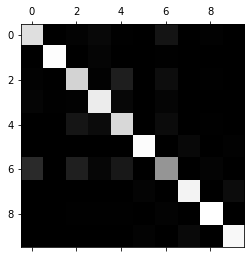

In [103]:
#lets take a look at image representation of the confusion matrix for RandomForestClassifier Model
#using the matplotlib's matshow() function

plt.matshow(forest_confusion_matrix, cmap=plt.cm.gray)

from above the confusion matrix looks fairly good since most images are on the main diagonal, i.e they were classified correctly.
some look slightly darker like the 6 than the other, which could be that the model doesn't perform well on them or there are fewer images of 6 in the dateset.
we can verify both focusing on only the error as shown below

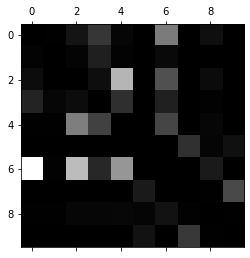

In [105]:
row_sums = forest_confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = forest_confusion_matrix / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

the image representation above clearly show the errors the randomforest classifier makes.
Rows represent the actual class
Columns represent the predicted classes
row 6 shows that there were fewer classes of values assigned to 6's is the dataset

## Fitting the RandomForestClassifier on the Validation set

In [106]:
X_val_scaled = scaler.transform(X_val)

In [107]:
X_val_predictions = forest.predict(X_val_scaled)

In [109]:
val_scores = cross_val_score(forest, X_val_scaled, y_val, cv=3, scoring='accuracy')

print('Scores:', val_scores)
print('Mean:', val_scores.mean())
print('Standard Deviation:', val_scores.std())
print('\n')


Scores: [0.8575  0.84725 0.84825]
Mean: 0.851
Standard Deviation: 0.004614289399969086




In [111]:
val_conf = confusion_matrix(y_val, X_val_predictions)
val_conf

array([[1056,    0,    9,   46,    4,    2,  108,    0,    7,    0],
       [   1, 1128,    2,   34,    2,    0,    7,    0,    0,    0],
       [   5,    1,  991,   17,  122,    0,   54,    0,   10,    0],
       [  19,    3,    6, 1147,   36,    0,   28,    0,    3,    0],
       [   3,    2,   97,   48,  969,    0,   62,    0,    4,    0],
       [   0,    0,    0,    0,    0, 1103,    0,   24,    4,   10],
       [ 205,    1,  148,   30,  129,    2,  708,    0,   20,    0],
       [   0,    0,    0,    0,    0,   29,    0, 1153,    3,   39],
       [   2,    0,    4,    1,    2,    2,    7,    3, 1128,    0],
       [   0,    0,    0,    0,    0,   13,    0,   40,    2, 1155]],
      dtype=int64)

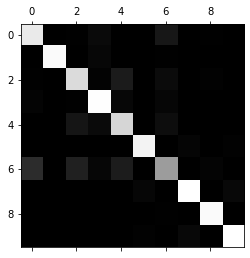

In [112]:
plt.matshow(val_conf, cmap=plt.cm.gray)

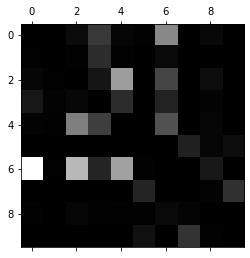

In [113]:
#focusing on only the errors
row_sums = val_conf.sum(axis=1, keepdims=True)
norm_conf_mx = val_conf / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

from the representation shown above it shows that the RandomForestClassifier also perfoms fairly good on new instances.

In [121]:
#PRECISION AND RECALL SCORE
from sklearn.metrics import precision_score, recall_score
print('Precision Score:\n', precision_score(y_val, X_val_predictions, average=None))
print('Recall Score:\n', recall_score(y_val, X_val_predictions, average=None))

Precision Score:
 [0.81797057 0.9938326  0.78838504 0.86696901 0.76661392 0.95829713
 0.72689938 0.94508197 0.95512278 0.95930233]
Recall Score:
 [0.85714286 0.96081772 0.82583333 0.92351047 0.81772152 0.96669588
 0.5695897  0.94199346 0.98172324 0.95454545]


# Observation on Precision and Recall Score
since we trained a multiclass classification and not binary classifier, setting the average=None will return the precision scores for each class.
while also setting the average='micro' will return the total ratio of tp/(tp+fp)

In [ ]:
from sklearn.metrics import precision_recall_curve

y_forest_proba = cross_val_predict(forest_clf, x_val_scaled, y_val, cv=5,
                                           method='predict_proba')
y_scores = y_forest_proba[:, 1]# gets the positive probabilities

precisions, recalls, thresholds = precision_recall_curve(y_val, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.xlabel('Threshold')
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(fontsize=20)
    plt.grid()

    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)